## FIX na yfinance

In [1]:
pip install yfinance==0.2.59

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


## Import bibliotek oraz wstepne zmienne

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
sp500_ticker = "^GSPC"
start_date = "2023-03-01"
end_date = "2025-05-01"

vix_ticker = "^VIX"

sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)['Close']
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)['Close']

sp500_data = sp500_data.reset_index().rename(columns={'Close': 'SP500_Close'})
vix_data = vix_data.reset_index().rename(columns={'Close': 'VIX_Close'})

merged_data = pd.merge(sp500_data, vix_data, on='Date', how='inner')



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
merged_data

Ticker,Date,^GSPC,^VIX
0,2023-03-01,3951.389893,20.580000
1,2023-03-02,3981.350098,19.590000
2,2023-03-03,4045.639893,18.490000
3,2023-03-06,4048.419922,18.610001
4,2023-03-07,3986.370117,19.590000
...,...,...,...
539,2025-04-24,5484.770020,26.469999
540,2025-04-25,5525.209961,24.840000
541,2025-04-28,5528.750000,25.150000
542,2025-04-29,5560.830078,24.170000


In [4]:
merged_data['SP_return'] = merged_data['^GSPC'].pct_change()
merged_data['VIX_return'] = merged_data['^VIX'].pct_change()

In [5]:
merged_data

Ticker,Date,^GSPC,^VIX,SP_return,VIX_return
0,2023-03-01,3951.389893,20.580000,NaN,NaN
1,2023-03-02,3981.350098,19.590000,0.007582,-0.048105
2,2023-03-03,4045.639893,18.490000,0.016148,-0.056151
3,2023-03-06,4048.419922,18.610001,0.000687,0.006490
4,2023-03-07,3986.370117,19.590000,-0.015327,0.052660
...,...,...,...,...,...
539,2025-04-24,5484.770020,26.469999,0.020259,-0.069596
540,2025-04-25,5525.209961,24.840000,0.007373,-0.061579
541,2025-04-28,5528.750000,25.150000,0.000641,0.012480
542,2025-04-29,5560.830078,24.170000,0.005802,-0.038966


## Wykres prostych zwrotów SP500 oraz VIX z okresu 01.03.25 - 01.05.25


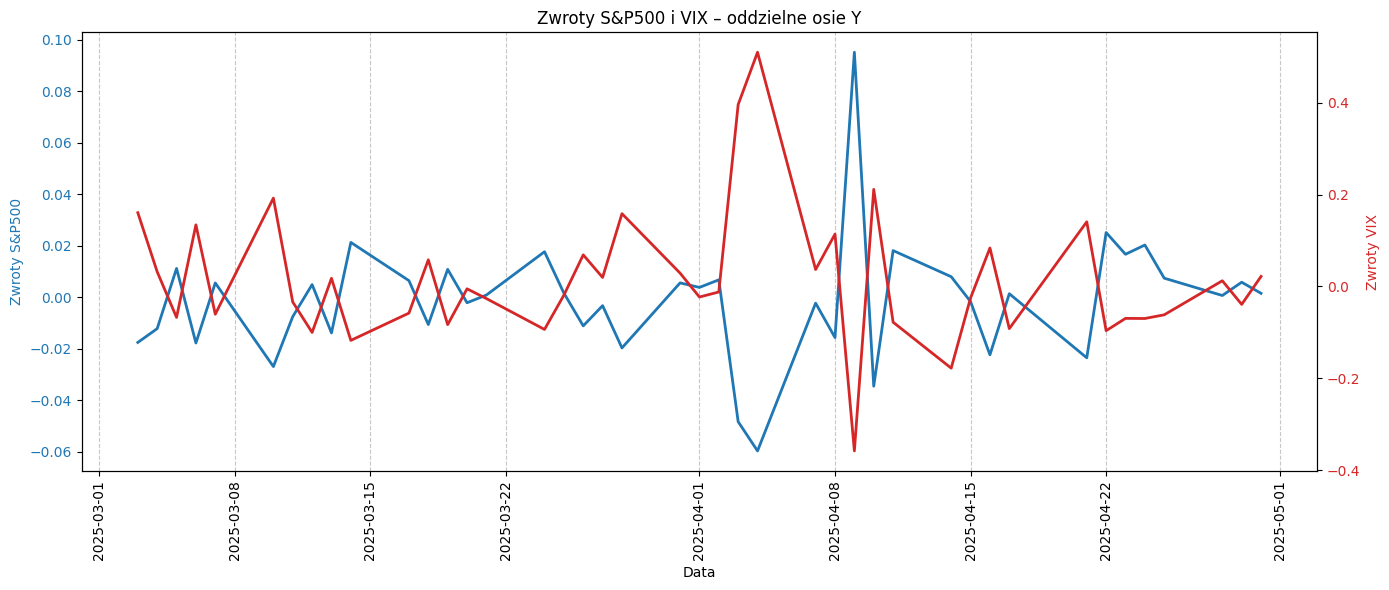

In [14]:
import matplotlib.pyplot as plt


filtered_data = merged_data[(merged_data['Date'] >= '2025-03-01') & (merged_data['Date'] <= '2025-05-01')]

fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Data')
ax1.set_ylabel('Zwroty S&P500', color=color)
ax1.plot(filtered_data['Date'], filtered_data['SP_return'], color=color, label='Zwroty S&P500', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Zwroty VIX', color=color)
ax2.plot(filtered_data['Date'], filtered_data['VIX_return'], color=color, label='Zwroty VIX', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Zwroty S&P500 i VIX – oddzielne osie Y')
fig.tight_layout()
plt.show()


## Obliczenie korelacji

In [13]:
filtered_data

Ticker,Date,^GSPC,^VIX,SP_return,VIX_return,rolling_volatility,shift_vix
502,2025-03-03,5849.720215,22.780001,-0.017597,0.160469,0.137876,16.600000
503,2025-03-04,5778.149902,23.510000,-0.012235,0.032046,0.138285,15.970000
504,2025-03-05,5842.629883,21.930000,0.011159,-0.067205,0.139946,15.060000
505,2025-03-06,5738.520020,24.870001,-0.017819,0.134063,0.146233,15.100000
506,2025-03-07,5770.200195,23.370001,0.005521,-0.060314,0.146323,15.020000
507,2025-03-10,5614.560059,27.860001,-0.026973,0.192127,0.163377,14.850000
508,2025-03-11,5572.069824,26.920000,-0.007568,-0.033740,0.160185,17.900000
509,2025-03-12,5599.299805,24.230000,0.004887,-0.099926,0.157911,16.410000
510,2025-03-13,5521.520020,24.660000,-0.013891,0.017747,0.161175,16.559999
511,2025-03-14,5638.939941,21.770000,0.021266,-0.117194,0.174375,15.840000


In [7]:
corr = merged_data['SP_return'].corr(merged_data['VIX_return'])
print(f"Korelacja Pearsona między zwrotem S&P 500 a zwrotem VIX: {corr:.3f} - silna ujemna ")


Korelacja Pearsona między zwrotem S&P 500 a zwrotem VIX: -0.787 - silna ujemna 


## Obliczenie miar do regresji:

1. Zmienność zrealizowana - odchylenie standardowe z 30 dni * pierwiastek(12)
2. indeks VIX przesunięty o 30 dni


In [15]:

#przygotowanie zmiennosci i VIX przesuniety
merged_data['rolling_volatility'] =merged_data['SP_return'].rolling(window=30).std() * np.sqrt(12)
merged_data['shift_vix'] = merged_data['^VIX'].shift(30)


## Model regresji

In [16]:
#zrobienie jednego dataframe
reg_data = merged_data[['rolling_volatility', 'shift_vix']].dropna()
reg_data['vix_return'] = merged_data['shift_vix'].pct_change()

#regresja
X = sm.add_constant(reg_data['shift_vix'])
y = reg_data['rolling_volatility']

#model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     rolling_volatility   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     93.87
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.71e-20
Time:                        16:45:44   Log-Likelihood:                 1562.4
No. Observations:                 514   AIC:                            -3121.
Df Residuals:                     512   BIC:                            -3112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.003      1.991      0.0